In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

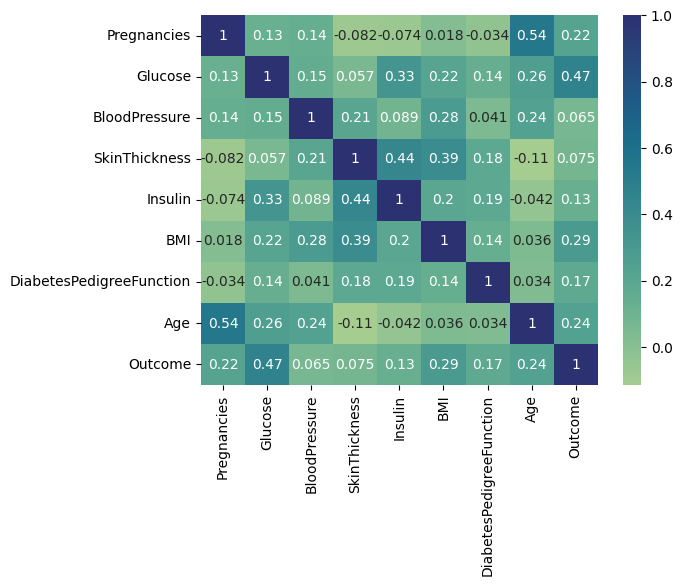

In [4]:
# Q1
df = pd.read_csv('./diabetes_csv.csv')
sns.heatmap(df.corr(), annot=True, cmap='crest')
df.drop(['Pregnancies'], axis=1) # Drop non-useful cols
df[(df != 0).all(axis=1)] # Drop all null values
print(df)
data_arr = df.values # Convert to np arr
print(data_arr)
X = data_arr[:, :-1] # All rows, All columns except last
y = data_arr[:, -1] # All rows, Select last col
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[9.94554455 2.77227723 6.87128713]
0.7134039539074896
[10.08695652  2.43143813  6.80602007]
0.9138883958610506


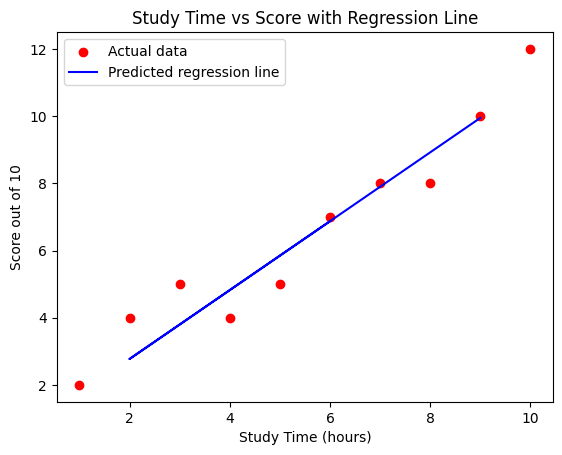

Predicted score for study time 10 hours: 10.9703


In [3]:
# Q2
data_arr = pd.read_csv('./study_data.csv').values
X = data_arr[:, :-1]
y = data_arr[:, -1]
n = len(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.flatten()

# Pedhazur Method
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)
numerator = np.sum((X_train - X_mean) * (y_train - y_mean))
denominator = np.sum((X_train - X_mean)**2)
B1_ped = numerator / denominator
B0_ped = y_mean - B1_ped * X_mean

y_pred_pedhazur = B0_ped + B1_ped * X_test.flatten()
rmse_pedhazur = np.sqrt(np.mean((y_test - y_pred_pedhazur)**2))

print(y_pred_pedhazur)
print(rmse_pedhazur)

# Calculus Method
sum_x = np.sum(X_train)
sum_y = np.sum(y_train)
sum_xx = np.sum(X_train ** 2)
sum_xy = np.sum(X_train * y_train)
B1_calc = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
B0_calc = (sum_y - B1_calc * sum_x) / n

y_pred_calc = B0_calc + B1_calc * X_test.flatten()
rmse_calc = np.sqrt(np.mean((y_test - y_pred_calc) ** 2))
print(y_pred_calc)
print(rmse_calc)

plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X_test, y_pred_pedhazur, color='blue', label='Predicted regression line')
plt.xlabel('Study Time (hours)')
plt.ylabel('Score out of 10')
plt.title('Study Time vs Score with Regression Line')
plt.legend()
plt.show()

study_time_test = 10
predicted_score = B0_ped + B1_ped * study_time_test
print(f"Predicted score for study time {study_time_test} hours: {predicted_score:.4f}")